In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ticker_data

In [2]:
START = "2019-01-01"
END = "2019-12-31"

NUM_FACTORS = 25
GAMMA = 10

# DUPLICATES = ['GOOGL', 'GOOG', 'DISCA', 'DISKC', 'FOXA', 'FOX', 'NWSA', 'NWS', 'UAA', 'UA']
DUPLICATES = ['GOOGL', 'DISCK', 'FOXA', 'NWSA', 'UAA']

<AxesSubplot:xlabel='date'>

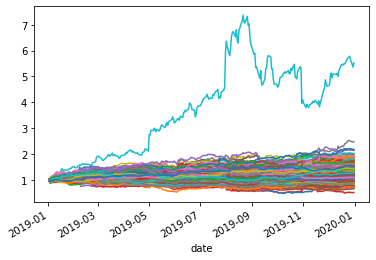

In [3]:
data = ticker_data.get_cross_sectional_data(START, END, "pct_change").drop(columns=DUPLICATES)
(1 + data).cumprod().plot(legend=False)

In [4]:
data.columns[(1 + data).cumprod().iloc[-1].argmax()]

'ENPH'

In [5]:
T, N = data.shape
X = data.values
W = np.diag(1 / (data.std().values))

In [6]:
Q = X @ W 
Q.T.shape

(481, 252)

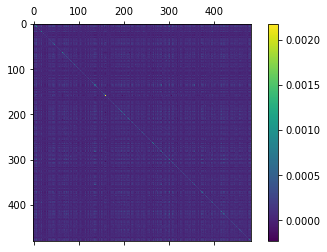

In [7]:
# RP_PCA = Q.T @ (np.eye(T) + (GAMMA / T) * (np.ones((T,1)) @ np.ones((1,T)))) @ Q / T
# RP_PCA = data.corr().values
RP_PCA = data.cov().values
fig, ax = plt.subplots()
cax = ax.matshow(RP_PCA)
fig.colorbar(cax)

In [8]:
vals, vecs = np.linalg.eigh(RP_PCA)
vals, vecs = vals[::-1], vecs[:,::-1]

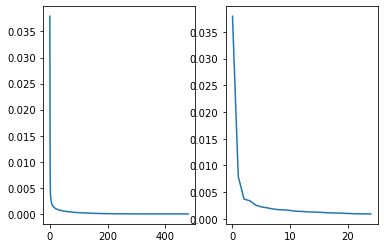

In [9]:
fig, ax = plt.subplots(1,2)
ax[0].plot(vals)
ax[1].plot(vals[:NUM_FACTORS])

In [10]:
np.sum(np.abs(vecs[:,:NUM_FACTORS]), axis=0).shape

(25,)

In [11]:
L = -vecs[:,:NUM_FACTORS] / np.sum(np.abs(vecs[:,:NUM_FACTORS]), axis=0)
F = X @ L
L = pd.DataFrame(L, index=data.columns, columns=['f%d' % (d+1) for d in range(NUM_FACTORS)])
F = pd.DataFrame(F, index=data.index, columns=['f%d' % (d+1) for d in range(NUM_FACTORS)])

In [12]:
F

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 05:00:00,0.003497,0.012885,0.004293,-0.001012,0.002802,0.003313,0.001225,-0.004956,0.002401,0.005700,...,-0.001653,-0.005637,0.005065,-0.003280,0.001729,0.004870,0.001190,-0.001946,-0.003421,-0.001443
2019-01-03 05:00:00,-0.026254,0.007004,-0.010195,-0.007370,-0.003484,0.002849,0.001640,-0.004232,-0.000828,0.000823,...,0.001774,-0.006659,-0.001183,0.003900,-0.001265,0.002793,-0.003124,-0.003348,-0.002345,-0.000220
2019-01-04 05:00:00,0.039331,-0.007631,-0.001201,-0.002694,0.002467,0.002311,0.000591,-0.001402,0.001956,0.001494,...,-0.000816,-0.003317,0.001932,-0.003915,-0.001785,-0.001381,0.005044,-0.002170,-0.002228,0.001320
2019-01-07 05:00:00,0.013546,-0.001353,0.002963,-0.003992,0.001264,0.000630,-0.001804,-0.006695,-0.007672,0.001845,...,0.004213,-0.003489,-0.002087,-0.002154,-0.000657,0.003343,0.001581,0.001070,0.001600,0.001574
2019-01-08 05:00:00,0.010258,-0.005523,-0.005344,-0.002720,0.001229,0.001227,-0.000067,-0.002640,-0.004492,0.000416,...,-0.002562,0.002475,0.000510,0.001985,-0.003424,-0.001616,0.003488,-0.000636,-0.000148,-0.000542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 05:00:00,-0.000019,-0.000886,0.000272,-0.000400,0.000059,0.000483,-0.000193,0.000126,-0.000602,-0.000830,...,-0.000270,-0.000466,0.000029,-0.001255,0.000449,0.000201,0.000875,0.000115,0.000043,0.001619
2019-12-26 05:00:00,0.002613,-0.000602,0.000473,0.000663,0.001972,0.000784,0.000515,-0.001971,-0.000149,-0.001051,...,-0.001145,0.000566,-0.000562,-0.000078,-0.000386,-0.000203,-0.001268,-0.000727,0.000411,0.000185
2019-12-27 05:00:00,-0.002488,-0.002560,-0.001323,0.001206,-0.001188,-0.000510,0.000387,0.000747,-0.001039,0.000473,...,0.000847,-0.000107,-0.000557,0.000721,0.000246,0.000234,0.000441,0.000320,0.000955,0.000847


In [13]:
spy_data, ndaq_data = ticker_data.get_market_data(START, END) 
market_data = pd.concat([md[['close']].rename(columns={'close': mn}).pct_change().dropna() for md, mn in zip([spy_data, ndaq_data], ["SPY", "NDAQ"])], axis=1)

<AxesSubplot:xlabel='date'>

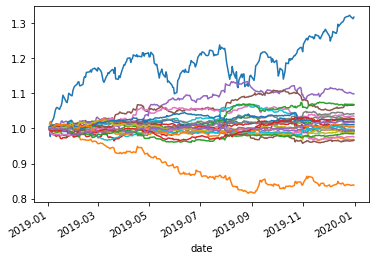

In [14]:
(1 + F).cumprod().plot(legend=False)

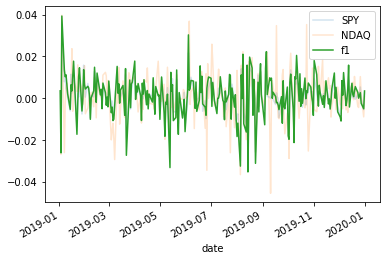

In [15]:
fig, ax = plt.subplots()
market_data.plot(ax=ax, alpha=0.2)
F['f1'].plot(ax=ax)
ax.legend()

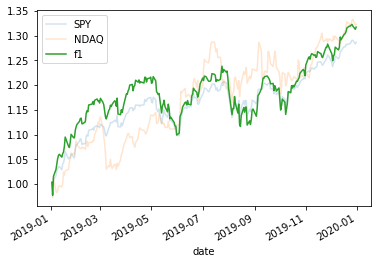

In [16]:
fig, ax = plt.subplots()
(1 + market_data).cumprod().plot(ax=ax, alpha=0.2)
(1 + F['f1']).cumprod().plot(ax=ax)
ax.legend()

<AxesSubplot:xlabel='date'>

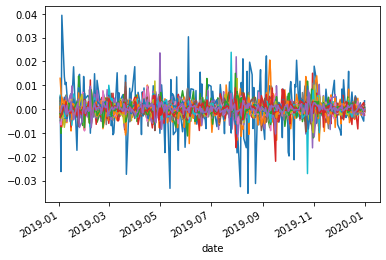

In [17]:
F.plot(legend=False)

<AxesSubplot:xlabel='date'>

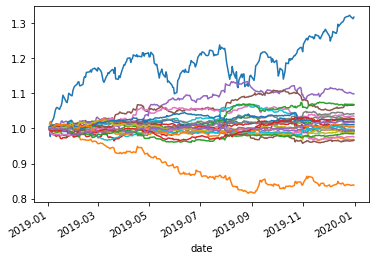

In [18]:
(1 + F).cumprod().plot(legend=False)